# Getting Started with OpenCV


OpenCV (Open Source Computer Vision) is a widely acclaimed open-source library that forms the backbone of many computer vision applications. With a rich history dating back to its inception in 1999, OpenCV has evolved into a versatile toolkit that empowers developers to create innovative solutions in the field of image and video analysis. Released under a permissive BSD license, OpenCV has garnered a strong community of researchers, engineers, and enthusiasts who contribute to its growth and enhancement {cite:p}`opencv_library, OpenCVDocumentation`.

CV2, often referred to as "opencv-python," is the Python wrapper for the OpenCV library. This wrapper brings the power of OpenCV's vast functionality to the Python programming ecosystem, making it accessible and convenient for Python developers. With CV2, you can perform a wide range of tasks, including image processing, feature extraction, object detection, video analysis, and more, using the intuitive and expressive syntax of Python.

CV2's integration with Python has contributed to its popularity and ubiquity in the field of computer vision. It offers a comprehensive suite of functions and tools that enable users to manipulate, analyze, and interpret visual data effortlessly. From simple tasks like image resizing and filtering to complex tasks such as building deep learning models for image recognition, CV2 provides the necessary building blocks.

This tutorial serves as an introductory guide, delving into the fundamental operations of OpenCV. Our journey will be facilitated by the image dataset sourced from scikit-learn, a widely-used machine learning library.

## Sample Images

`sklearn.datasets.load_sample_images()` is a function provided by scikit-learn {cite:p}`sklearnUserGuide`, a popular machine learning library in Python. This function is used to load a collection of sample images, which can be useful for testing and experimenting with image-based machine learning algorithms and data analysis pipelines.

When you call `load_sample_images()`, it retrieves a predefined set of sample images that are bundled with the scikit-learn library. These images cover a range of subjects and formats, providing a diverse set of data for practicing and developing image processing, computer vision, and machine learning techniques.

The loaded images are usually provided as a dictionary-like object, containing the images themselves, information about the images, and sometimes additional metadata. This allows you to quickly access and work with the sample images for various tasks. 
If you're interested, you can access the detailed documentation for this image dataset [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_images.html#sklearn.datasets.load_sample_images). 

<font color='Blue'><b>Example:</b></font>

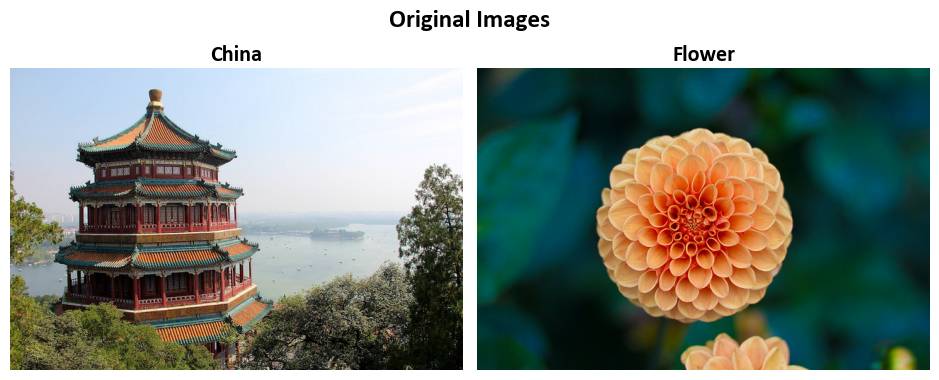

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt  # Import the plotting library
from sklearn.datasets import load_sample_images  # Import a function to load sample images

# Set font properties for plots
plt.rcParams.update({'font.family': 'Calibri', 'axes.titlesize': 16})

# Define a function to display images with titles and optional settings
def ImShow(Images, Names, title='Images', grayscale=False):
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(9.5, 4))  # Create a figure with 1 row and 2 columns of subplots
    ax = ax.ravel()  # Flatten the subplots for easier manipulation

    # Iterate over the first two images
    for i in range(2):
        # Display the image in grayscale if grayscale is True, otherwise in color
        ax[i].imshow(Images[i], cmap='gray' if grayscale else None)
        ax[i].set_aspect(1)  # Set aspect ratio to 1 (square aspect)
        ax[i].axis('off')  # Turn off axis
        ax[i].set_title(Names[i], weight='bold')  # Set image title with bold font

    if title:
        # Set main title if provided
        fig.suptitle(title, weight='bold', fontsize=18)

    plt.tight_layout()  # Adjust layout for better spacing

    return fig, ax

# Load sample images
Images = load_sample_images()['images']  # Load the sample images
# Extract image names from file paths, removing extension and converting to title case
Names = [x.split("/")[-1].replace('.jpg', '').title() for x in load_sample_images()['filenames']]

# Display the original images
_, _ = ImShow(Images, Names, title='Original Images')  # Call the ImShow function to display images

This code is a Python script that performs the following tasks:

1. **Importing Necessary Libraries**:
   - It begins by importing two libraries:
     - `matplotlib.pyplot as plt`: This library is used for creating plots and visualizing data.
     - `sklearn.datasets.load_sample_images`: This function is imported from the scikit-learn library and is used to load sample images for demonstration purposes.

2. **Setting Font Properties for Plots**:
   - The code sets specific font properties for the plots created using Matplotlib. It sets the font family to 'Calibri' and the title font size to 16.

3. **Defining a Function - `ImShow`**:
   - This code defines a function named `ImShow` which is used to display images with titles and optional settings. The function takes the following parameters:
     - `Images`: A list of images to be displayed.
     - `Names`: A list of corresponding image names.
     - `title` (optional): A title for the set of images.
     - `grayscale` (optional): A flag to indicate whether the images should be displayed in grayscale.

   - Inside the function:
     - It creates a figure with two subplots arranged in a single row and two columns.
     - It flattens the subplots into a one-dimensional array for easier manipulation.
     - It iterates over the first two images in the `Images` list and displays them in grayscale or color based on the `grayscale` flag.
     - It sets the aspect ratio of each subplot to 1 (making them square), turns off the axis, and sets a title for each image with a bold font.
     - If a `title` is provided, it sets a main title for the figure with a bold font and a specified fontsize.
     - Finally, it adjusts the layout for better spacing and returns the figure and axis objects.

4. **Loading Sample Images**:
   - It uses the `load_sample_images` function from scikit-learn to load a set of sample images. These images are stored in the `Images` variable.
   - It also extracts image names from file paths, removes the '.jpg' extension, and converts them to title case. These names are stored in the `Names` variable.

5. **Displaying Original Images**:
   - The `ImShow` function is called to display the original images loaded from the sample dataset. The function is provided with the loaded images (`Images`), their corresponding names (`Names`), and a title ('Original Images').
   - The results of the function call are not assigned to any variables (indicated by `_`) as the function returns both the figure and axis objects, but they are not used further in this code.

## Accessing and Manipulating Pixel Values in Images

To gain precise control over pixel values within an image, we leverage the versatile `split` function {cite:p}`opencv_library, OpenCVDocumentation`. This function proves invaluable in dissecting the intricate tapestry of color channels present within an image.

In the digital imaging realm, each channel corresponds to a distinct color component. In the ubiquitous RGB color model, we encounter the vibrant Red, Green, and Blue channels. Alternatively, the CMYK model introduces Cyan, Magenta, Yellow, and Black channels. These models, alongside others, collectively govern an image's appearance through their distinctive channels.

In [7]:
import cv2
from sklearn.datasets import load_sample_image

# Load an example image
Img = load_sample_image('flower.jpg')

# Split the channels of the first image in the 'Images' dataset
B, G, R = cv2.split(Img)

The following line of code utilizes the `cv2.split()` function to split the channels of the first image in the 'Images' dataset. This function separates the image into its individual color channels, where `B` corresponds to the Blue channel, `G` to the Green channel, and `R` to the Red channel. These channels represent the components that collectively create the image's color when combined.

```{figure} CV2_BGR.png
---
width: 450px
align: center
---
Visual representation of `B, G, R = cv2.split(Img)`.
```

Alternatively, we can access the red, green, and blue channels of `Img` using the indexing syntax `Img[:,:,0]`, `Img[:,:,1]`, and `Img[:,:,2]`. This concise notation allows direct access to each color channel within the image, where the indices 0, 1, and 2 correspond to the red, green, and blue channels respectively. This indexing approach provides a convenient and efficient way to work with individual color channels, enabling focused manipulation and analysis of the image's color components.

```{figure} RGB_bands.png
---
width: 300px
align: center
---
Visual representation of the three bands of `Img`.
```

`````{admonition} Remark
:class: important

The order of the three color channels in an image and the output of `cv2.split(img)` in OpenCV might appear different due to how they represent the color information. This difference stems from historical conventions and the way images are stored in memory.

**RGB Order in Images:**

In standard RGB (Red, Green, Blue) images, the channels are typically arranged in the following order:

1. <font color='Red'><b>Red (R)</b></font>
2. <font color='Green'><b>Green (G)</b></font>
3. <font color='Blue'><b>Blue (B)</b></font>

This order is based on human perception and the way colors are traditionally represented in digital imaging. The red channel contains information about the intensity of red in each pixel, followed by green and then blue.

**OpenCV's `cv2.split(img)` Order:**

OpenCV, which is primarily used for computer vision and image processing tasks, often follows a different convention when splitting color channels using `cv2.split(img)`. The order is as follows:

1. <font color='Blue'><b>Blue (B)</b></font>
2. <font color='Green'><b>Green (G)</b></font>
3. <font color='Red'><b>Red (R)</b></font>

This order might seem counterintuitive when compared to the RGB order, but it is used for compatibility with certain image processing algorithms and the way images are stored in memory in the BGR (Blue, Green, Red) format.

It's important to be aware of this difference when working with OpenCV, especially if you are integrating it with other libraries or software that expect RGB order. You may need to reorder the channels if necessary.

`````

<font color='Blue'><b>Example:</b></font>

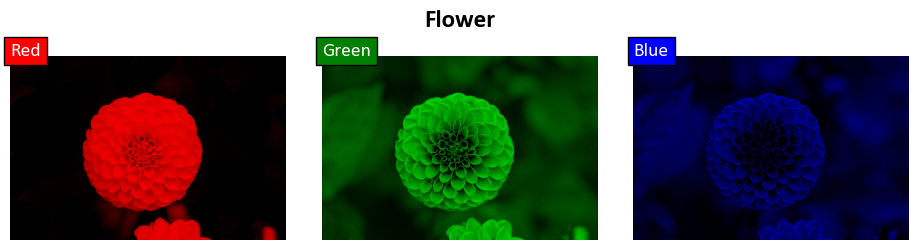

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

# Load an example image
image = load_sample_image('flower.jpg')

# Create a figure with three subplots to display the color channels
fig, axes = plt.subplots(1, 3, figsize=(9.5, 2.5))
axes = axes.ravel()  # Flatten the subplots for easier manipulation

# Set the main title to the name of the image
_ = fig.suptitle('Flower', weight='bold', fontsize=18)

# Iterate over the three color channels
for i, (ax, channel_name) in enumerate(zip(axes, ['Red', 'Green', 'Blue'])):
    # Create an image with all zeros (black image) of the same size as the original image
    channel_image = 0 * image
    # Assign the values of the current color channel to the corresponding channel in the black image
    channel_image[:, :, i] = image[:, :, i]
    # Display the image for the current color channel in the subplot
    _ = ax.imshow(channel_image)
    # Set aspect ratio to 1 to avoid stretching
    _ = ax.set_aspect(1)
    # Turn off axis for cleaner visualization
    _ = ax.axis('off')
    # Add text label indicating the color channel
    _ = ax.text(x=0, y=0, s=channel_name, size=14,
                color='White', bbox=dict(boxstyle="square", ec='k', fc= channel_name))

plt.tight_layout()

This code demonstrates how to visualize the individual color channels (Red, Green, and Blue) of an image using Matplotlib. Let's break down the code step by step:

1. `import matplotlib.pyplot as plt`:
   - This line imports the `matplotlib` library's `pyplot` module and aliases it as `plt`. It allows you to create visualizations and plots.

2. `from sklearn.datasets import load_sample_image`:
   - This line imports the `load_sample_image` function from the `datasets` module of the `sklearn` (scikit-learn) library. It is used to load an example image.

3. `image = load_sample_image('flower.jpg')`:
   - Here, the `load_sample_image` function is called with the argument `'flower.jpg'`. It loads an example image named 'flower.jpg' and assigns it to the variable `image`.

4. `fig, axes = plt.subplots(1, 3, figsize=(9.5, 2.5))`:
   - This line creates a figure (`fig`) with three subplots arranged in one row and three columns. The `figsize` parameter sets the dimensions of the figure to 9.5 inches in width and 2.5 inches in height. The resulting `axes` variable is a collection of the subplot axes.

5. `axes = axes.ravel()`:
   - The `axes` variable, which initially contains a 2D array of subplots, is flattened into a 1D array using the `ravel()` method. This makes it easier to manipulate the subplots.

6. `_ = fig.suptitle('Flower', weight='bold', fontsize=18)`:
   - This line sets the main title of the figure to 'Flower' with a bold font style and a font size of 18. The use of `_` suggests that the return value is not explicitly used, which is common when setting titles or labels.

7. `for i, (ax, channel_name) in enumerate(zip(axes, ['Red', 'Green', 'Blue'])):`:
   - This is a for loop that iterates over three color channels: Red, Green, and Blue. It uses the `enumerate` function to get both the index `i` and the corresponding subplot `ax` and channel name `channel_name`.

8. `channel_image = 0 * image`:
   - Inside the loop, a new variable `channel_image` is created, initialized as a black image (all values set to 0) with the same dimensions as the original `image`.

9. `channel_image[:, :, i] = image[:, :, i]`:
   - This line assigns the values of the current color channel (Red, Green, or Blue) from the original `image` to the corresponding channel in the `channel_image`.

10. `_ = ax.imshow(channel_image)`:
    - It displays the `channel_image` in the current subplot `ax` using `imshow`, showing the isolated color channel.

11. `_ = ax.set_aspect(1)`:
    - This sets the aspect ratio of the subplot to 1, ensuring that the image is displayed without stretching.

12. `_ = ax.axis('off')`:
    - It turns off the axis (ticks and labels) for the current subplot, providing a cleaner visualization.

13. `_ = ax.text(x=0, y=0, s=channel_name, size=14, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))`:
    - This line adds a text label to the current subplot. It displays the `channel_name` (e.g., 'Red', 'Green', 'Blue') in Navy color with a LightSkyBlue background in a square-shaped box at coordinates (0, 0).

14. `plt.tight_layout()`:
    - Finally, `tight_layout()` is called to ensure that the subplots are neatly arranged within the figure without overlapping.

## Adding Padding: Exploring Border Types in OpenCV

In image processing, padding or adding borders to an image is a common operation, often used in tasks like convolution or resizing. OpenCV provides several border types, each with its own unique behavior {cite:p}`opencv_library, OpenCVDocumentation`. The `cv2.copyMakeBorder` function in OpenCV is used to create a new image (destination, `dst`) by adding a border around the original image (source, `src`). The border is created based on the specified parameters, such as the offset, border type, and value of the border pixels. Here's an explanation of the function signature:

```
cv2.copyMakeBorder(src, dst, offset, bordertype, value=(0, 0, 0, 0)) → None
```

- `src`: The source image, which is the input image to which the border will be added.
- `dst`: The destination image, where the result (image with border) will be stored. It should have the size of the output image, which can be calculated based on the input image and the specified offset.
- `offset`: A tuple `(top, bottom, left, right)` that specifies the number of pixels for each side (top, bottom, left, right) by which the image will be extended with the border.
- `bordertype`: The type of border to be added, specified as an integer constant. Common border types include `cv2.BORDER_CONSTANT`, `cv2.BORDER_REPLICATE`, `cv2.BORDER_REFLECT`, and others.
- `value`: The value of the border pixels. This parameter is optional and is only used when the `bordertype` is set to `cv2.BORDER_CONSTANT`. The default value is `(0, 0, 0, 0)`, which corresponds to black in grayscale images.

The `cv2.copyMakeBorder` function modifies the `dst` image by adding a border around the `src` image based on the specified offset and border type. The resulting image in `dst` will have a larger size than the original image, with the specified border.

It's important to note that the `dst` image should be pre-allocated to accommodate the new size, and the dimensions of the `dst` image can be calculated based on the dimensions of the `src` image and the specified offset.


Let's delve into these border types:

- **`cv2.BORDER_CONSTANT`**: This option introduces a border with a consistent color, effectively extending the image's dimensions. The border's color remains the same throughout, making it suitable for scenarios where a constant background is desired.

- **`cv2.BORDER_REFLECT`**: When using this option, the border is generated by reflecting the elements along the boundary. This results in a pattern that resembles a mirror reflection, such as "fedcba|abcdefgh|hgfedcb". It provides a smooth and continuous appearance at the border.

- **`cv2.BORDER_REFLECT_101` (or `cv2.BORDER_DEFAULT`)**: Similar to `BORDER_REFLECT`, this option creates a border with mirrored reflection. However, the pattern differs slightly, appearing as "gfedcb|abcdefgh|gfedcba". This border type is popular for tasks that require symmetry preservation.

- **`cv2.BORDER_REPLICATE`**: This option duplicates the last element of each row or column to form the border. The resulting pattern looks like "aaaaaa|abcdefgh|hhhhhhh", effectively maintaining the edge consistency.

- **`cv2.BORDER_WRAP`**: Utilizing this option, the image wraps around to form a circular-like pattern in the border. The pattern could be described as "cdefgh|abcdefgh|abcdefg". This border type is particularly useful for applications dealing with cyclic or periodic data.

For an in-depth understanding of these border types, along with practical code examples and usage scenarios, it's highly recommended to refer to the official OpenCV documentation available [here](https://docs.opencv.org/3.4/dc/da3/tutorial_copyMakeBorder.html). This documentation provides detailed insights and examples, enabling you to leverage these border types effectively in various image processing tasks {cite:p}`opencv_library, OpenCVDocumentation`.

<font color='Blue'><b>Example:</b></font>

Red RGB Color: [255, 0, 0]


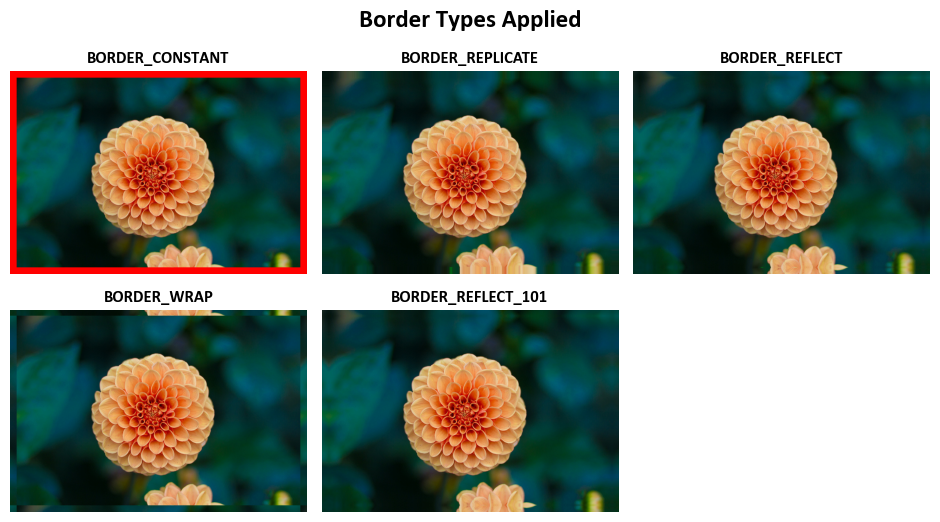

In [19]:
import cv2
import matplotlib.pyplot as plt

# Mapping of OpenCV border types to their descriptive names
cv2_border_dict = {cv2.BORDER_CONSTANT: 'BORDER_CONSTANT',
                   cv2.BORDER_REPLICATE: 'BORDER_REPLICATE',
                   cv2.BORDER_REFLECT: 'BORDER_REFLECT',
                   cv2.BORDER_WRAP: 'BORDER_WRAP',
                   cv2.BORDER_REFLECT_101: 'BORDER_REFLECT_101'}


Red_RGB = [255, 0, 0]
print('Red RGB Color:', Red_RGB)

# Create a 2x3 grid of subplots to display images
fig, ax = plt.subplots(2, 3, figsize=(9.5, 5.5))
ax = ax.ravel()
fig.delaxes(ax[-1])  # Remove the last subplot (blank)

# Set the title for the overall figure
fig.suptitle('Border Types Applied', weight='bold', fontsize=18)

# Iterate over the different border types and apply them to the image
for i, (border_type, name) in enumerate(cv2_border_dict.items()):
    # Apply the specified border to the image (Images[1]) with padding values
    img_with_border = cv2.copyMakeBorder(Images[1], 15, 15, 15, 15, border_type, value = Red_RGB)
    # value = Red_RGB will be used only if border_type = cv2.BORDER_CONSTANT
    # Display the image with the applied border on the current subplot
    ax[i].imshow(img_with_border)
    ax[i].set_aspect(1)
    ax[i].axis('off')
    ax[i].set_title(name, weight='bold', fontsize=12)

plt.tight_layout()

This code demonstrates the application of different border types to an image using the OpenCV library and visualizes the results using Matplotlib subplots. Let's break down the code step by step:

1. **Importing Libraries:**
   The code begins by importing two Python libraries: `cv2` for computer vision tasks and `matplotlib.pyplot` for visualization.

2. **Creating a Dictionary for Border Types:**
   A dictionary called `cv2_border_dict` is defined to map OpenCV border types to their corresponding descriptive names. This is useful for labeling the subplots later in the code.

3. **Defining a Red RGB Color:**
   The RGB color code for red, `[255, 0, 0]`, is defined and stored in the variable `Red_RGB`. This color will be used as the padding color when applying certain border types.

4. **Creating Subplots:**
   A 2x3 grid of subplots is created using `plt.subplots(2, 3, figsize=(9.5, 5.5))`. This grid will be used to display the original image and various versions of it with different border types.

5. **Removing the Last Subplot:**
   The last subplot is removed from the grid using `fig.delaxes(ax[-1])` because there are only 5 border types to display.

6. **Setting Figure Title:**
   A title, 'Border Types Applied', is set for the entire figure using `fig.suptitle()`.

7. **Iterating Over Border Types:**
   The code iterates over the `cv2_border_dict` dictionary, which contains the different OpenCV border types and their names.

8. **Applying Borders to the Image:**
   Inside the loop, each border type is applied to the image `Images[1]` using `cv2.copyMakeBorder()`. Padding values of 15 pixels are added on all sides, and the color used for padding is specified as `Red_RGB`. The `value = Red_RGB` argument ensures that the red color is used only when `border_type` is `cv2.BORDER_CONSTANT`.

9. **Displaying the Images:**
   The images with the applied borders are displayed on the current subplot using `ax[i].imshow()`. Axis labels are turned off with `ax[i].axis('off')`, and each subplot is given a title corresponding to the border type.

10. **Tight Layout:**
    Finally, `plt.tight_layout()` is used to ensure that the subplots are properly arranged within the figure.

## Image Blending: Using the `cv2.addWeighted` Function

Image blending is a fundamental technique in image processing that combines two images to create a new composite image. OpenCV provides the `cv2.addWeighted` function, which performs image blending based on a weighted sum of the input images and an additional constant value. Here's an explanation of the blending formula and how it works 
{cite:p}`opencv_library, OpenCVDocumentation`:

The formula for image blending using `cv2.addWeighted` is as follows:

\begin{equation}
dst = \alpha \cdot \text{src1} + \beta \cdot \text{src2} + \gamma
\end{equation}

In this formula:
- `src1` and `src2` are the two input images to be blended.
- $\alpha$ is a weighting factor that determines the influence of `src1` in the final output. It satisfies the condition $0 \leq \alpha \leq 1$, meaning it controls the relative contribution of `src1` to the blended image.
- $\beta = 1 - \alpha$ represents the weighting factor for `src2`, ensuring that the sum of the weights for both images is 1.
- $\gamma$ is an additional constant value that can be added to the blended result. It is an integer value that can be used for brightness adjustment.

The `cv2.addWeighted` function in OpenCV is used for image blending, which combines two input images (`src1` and `src2`) together using a specified weight for each image. The resulting blended image is stored in the destination image (`dst`). Here's an explanation of the function signature:

```
cv2.addWeighted(src1, alpha, src2, beta, gamma, dst) → None
```

- `src1`: The first source image, which is the primary input image for blending.
- `alpha`: The weight applied to the first source image (`src1`). This value determines the contribution of `src1` to the final result. A larger `alpha` value increases the influence of `src1`.
- `src2`: The second source image, which is the secondary input image for blending.
- `beta`: The weight applied to the second source image (`src2`). This value determines the contribution of `src2` to the final result. A larger `beta` value increases the influence of `src2`.
- `gamma`: A scalar added to the weighted sum of the two source images. This value can be used to control the brightness or contrast of the resulting image.
- `dst`: The destination image, where the blended image is stored. The dimensions of this image should match the dimensions of the input images.

You can see the full description of this function [here](https://docs.opencv.org/3.4/d5/dc4/tutorial_adding_images.html).

The `cv2.addWeighted` function performs a linear combination of the two source images (`src1` and `src2`) based on the specified weights `alpha` and `beta`, and then adds the scalar `gamma` to the resulting sum. The resulting blended image is written to the `dst` image {cite:p}`opencv_library, OpenCVDocumentation`.

This function is commonly used for image fusion, creating special effects, adjusting image brightness and contrast, and other image processing tasks where combining two images with different weights is required. The `alpha` and `beta` values control the influence of each source image, and the `gamma` value can be used to control the overall brightness or contrast of the final image.

<font color='Blue'><b>Example:</b></font>

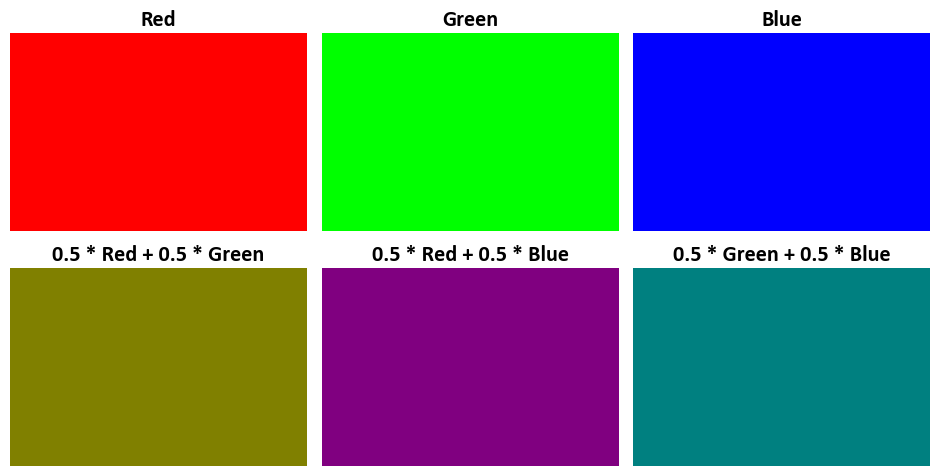

In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the size of the images
size = (100, 150)

# Create two sample images with different color channels
Image_Red = np.zeros((size[0], size[1], 3), dtype=np.uint8)
Image_Red[:,:,0] = 255 * np.ones(size, dtype=np.uint8)

Image_Green = np.zeros((size[0], size[1], 3), dtype=np.uint8)
Image_Green[:,:,1] = 255 * np.ones(size, dtype=np.uint8)

Image_Blue = np.zeros((size[0], size[1], 3), dtype=np.uint8)
Image_Blue[:,:,2] = 255 * np.ones(size, dtype=np.uint8)

# Create a subplot with three rows and two columns for visualization
fig, ax = plt.subplots(2, 3, figsize=(9.5, 5))
ax = ax.ravel()

# Display the first image on the first subplot
_ = ax[0].imshow(Image_Red)
_ = ax[0].set_title('Red', weight='bold')

_ = ax[1].imshow(Image_Green)
_ = ax[1].set_title('Green', weight='bold')

_ = ax[2].imshow(Image_Blue)
_ = ax[2].set_title('Blue', weight='bold')

# Blend the images and display the results
_ = ax[3].imshow(cv2.addWeighted(Image_Red, 0.5, Image_Green, 0.5, 0))
_ = ax[3].set_title('0.5 * Red + 0.5 * Green', weight='bold')

_ = ax[4].imshow(cv2.addWeighted(Image_Red, 0.5, Image_Blue, 0.5, 0))
_ = ax[4].set_title('0.5 * Red + 0.5 * Blue', weight='bold')

_ = ax[5].imshow(cv2.addWeighted(Image_Green, 0.5, Image_Blue, 0.5, 0))
_ = ax[5].set_title('0.5 * Green + 0.5 * Blue', weight='bold')

# Set aspect ratio and turn off axes for all subplots
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')

# Ensure tight layout
plt.tight_layout()

Here is a step-by-step explanation of the code:

1. Importing Libraries:
   - `import numpy as np`: This line imports the NumPy library and gives it the alias "np" for convenience. NumPy is used for numerical computations, especially when working with arrays and matrices.
   - `import cv2`: This imports the OpenCV library, which is a popular computer vision library often used for image processing.
   - `import matplotlib.pyplot as plt`: This imports the Matplotlib library with the alias "plt" for creating data visualizations, including plots and images.

2. Defining Image Size:
   - `size = (100, 150)`: This line defines the size of the images to be created. The size is specified as a tuple with width (100) and height (150) in pixels.

3. Creating Sample Images:
   - The code creates three sample images, each representing one color channel (Red, Green, and Blue) of an RGB image.
   - For each image (`Image_Red`, `Image_Green`, and `Image_Blue`):
     - `np.zeros((size[0], size[1], 3), dtype=np.uint8)`: This line creates an empty image filled with zeros. The shape of the image is defined by `size`, and `dtype=np.uint8` specifies that the image has an unsigned 8-bit integer data type.
     - `Image_Red[:,:,0] = 255 * np.ones(size, dtype=np.uint8)`: This line sets all the values in the first color channel (Red) to 255, making it fully red. Similar operations are performed for the Green and Blue channels.

4. Creating Subplots for Visualization:
   - `fig, ax = plt.subplots(2, 3, figsize=(9.5, 5))`: This line creates a 2x3 grid of subplots for visualization. It also specifies the overall figure size.
   - `ax = ax.ravel()`: This flattens the 2D array of subplots into a 1D array for easier access.

5. Displaying Images:
   - The script displays six images within the subplots.
   - `ax[0].imshow(Image_Red)`, `ax[1].imshow(Image_Green)`, and `ax[2].imshow(Image_Blue)` display the Red, Green, and Blue images, respectively.
   - `ax[3].imshow(cv2.addWeighted(Image_Red, 0.5, Image_Green, 0.5, 0))`, `ax[4].imshow(cv2.addWeighted(Image_Red, 0.5, Image_Blue, 0.5, 0))`, and `ax[5].imshow(cv2.addWeighted(Image_Green, 0.5, Image_Blue, 0.5, 0))` display the result of blending the Red and Green, Red and Blue, and Green and Blue images with equal weights.

6. Adding Titles and Adjusting Subplot Properties:
   - For each subplot, a title is set using `_ = ax[i].set_title(...)`. These titles indicate the content of each subplot.
   - The aspect ratio is set to 1 for each subplot to ensure that the images are not distorted.
   - The axes for all subplots are turned off to improve the visual presentation.

7. Ensuring a Tight Layout:
   - `plt.tight_layout()` is called to ensure that the subplots are properly arranged within the figure.

8. Displaying the Plot:
   - `plt.show()` is used to display the final visualization with all subplots and images.

<font color='Blue'><b>Example:</b></font>

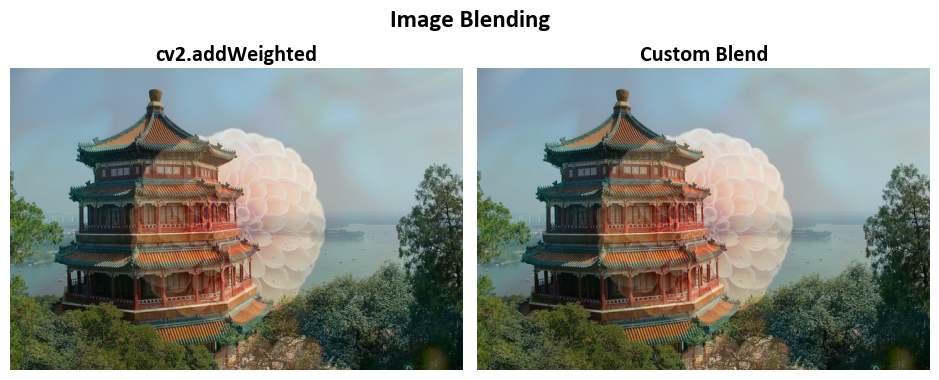

In [5]:
# Import necessary libraries
import numpy as np  # Import numpy for array operations
import matplotlib.pyplot as plt  # Import matplotlib for visualization
import cv2  # Import OpenCV for image processing

# Load example images ('china.jpg' and 'flower.jpg' assumed to be available)
Img1 = load_sample_image('china.jpg')
Img2 = load_sample_image('flower.jpg')

# Method 1: Using cv2.addWeighted for Image Blending
# Blend two different images using weighted sums
# 0.7 and 0.3 are the weights applied to the first and second image, respectively
# 0 is the scalar value added to the resulting image
augmented_img_01 = cv2.addWeighted(Img1, 0.7, Img2, 0.3, 0)

# Method 2: Custom Image Blending
# Blend two different images using custom weighted sums
# We use numpy for element-wise multiplication and addition, rounding the result, and converting to 'uint8' data type
# This technique allows manual control of blending weights
augmented_img_02 = np.round((0.7 * Img1 + 0.3 * Img2)).astype('uint8')

# Display the original and transformed images with titles
fig, ax = ImShow(Images=[augmented_img_01, augmented_img_02],
                 Names=['cv2.addWeighted', 'Custom Blend'],
                 title='Image Blending')

This code demonstrates image blending using two different methods, and it showcases the results in a side-by-side comparison using subplots. Here's a step-by-step explanation:

1. Importing Libraries:
   - `import numpy as np`: This imports the NumPy library, which is commonly used for array operations and numerical computations.
   - `import matplotlib.pyplot as plt`: This imports the Matplotlib library, particularly the `pyplot` module, for creating visualizations and plots.
   - `import cv2`: This imports the OpenCV library, which is used for various image processing tasks.

2. Loading Images:
   - `Img1 = load_sample_image('china.jpg')`: This code assumes that there is a function named `load_sample_image` that loads the image named 'china.jpg' and assigns it to the variable `Img1`. Similarly, 'flower.jpg' is loaded into `Img2`. The assumption is that these image files are available in the working directory.

3. Method 1: Using `cv2.addWeighted` for Image Blending:
   - `augmented_img_01 = cv2.addWeighted(Img1, 0.7, Img2, 0.3, 0)`: This line blends two different images, `Img1` and `Img2`, using the `cv2.addWeighted` function. It applies a weighted sum where 0.7 and 0.3 are the weights applied to the first and second images, respectively. The last parameter (0) specifies a scalar value added to the resulting image, effectively acting as an offset.

4. Method 2: Custom Image Blending:
   - `augmented_img_02 = np.round((0.7 * Img1 + 0.3 * Img2)).astype('uint8')`: In this method, two different images (`Img1` and `Img2`) are blended using custom weighted sums. NumPy is used for element-wise multiplication and addition of the pixel values. The result is rounded and cast to 'uint8' data type, which is a common data type for image pixels. This technique allows manual control of the blending weights.

5. Displaying Images:
   - `fig, ax = ImShow(Images=[augmented_img_01, augmented_img_02], ...`: This code attempts to display the original and transformed images side by side using a function called `ImShow`. The `Images` list contains the blended images (`augmented_img_01` and `augmented_img_02`), and the `Names` list provides titles for each image, 'cv2.addWeighted' and 'Custom Blend'. The `title` argument specifies the title for the entire visualization.

## Bitwise Operations in OpenCV


Bitwise operations are fundamental operations in computer programming and image processing that manipulate individual bits within binary representations of data. These operations involve performing logical and mathematical operations at the bit level, which can be particularly useful in tasks such as image manipulation, data compression, encryption, and hardware-level operations. You can perform bitwise operations on integers and use these operations for image processing with libraries like OpenCV. Here's a brief overview of how bitwise operations work in Python:

```{figure} bitwise_op.png
---
width: 600px
align: left
---
Examples of Bitwise Operations.
```

1. **Bitwise AND (`&`) and OR (`|`)**:
   You can use the `&` operator for bitwise AND and the `|` operator for bitwise OR. These operators compare corresponding bits of two integers and produce a new integer where each bit is the result of the corresponding bitwise operation.

In [6]:
# Given integers
a = 21
b = 28

# Print the binary representation of a and b
print('Binary for %i = %s' % (a, bin(a)))
print('Binary for %i = %s' % (b, bin(b)))

# Bitwise AND operation
result_and = a & b  # Bitwise AND: 0001 (1 in decimal)
print('a & b = %i (%s)' % (result_and, bin(result_and)))

# Bitwise OR operation
result_or = a | b   # Bitwise OR: 0111 (7 in decimal)
print('a | b = %i (%s)' % (result_or, bin(result_or)))

Binary for 21 = 0b10101
Binary for 28 = 0b11100
a & b = 20 (0b10100)
a | b = 29 (0b11101)


`````{admonition} Remark
:class: important

To convert a number to its binary representation in Python, you can use the `bin()` function. This function takes an integer as input and returns a string that represents the binary value of that integer, with the "0b" prefix {cite:p}`PythonDocumentation`.

Here's an example:

```python
number = 42
binary_value = bin(number)

print(binary_value)  # Output: '0b101010'
```

If you want to remove the "0b" prefix and get the binary representation as a plain string, you can use string slicing:

```python
number = 42
binary_string = bin(number)[2:]

print(binary_string)  # Output: '101010'
```

If you need to pad the binary representation with leading zeros to a certain length (e.g., 8 bits), you can use the `format()` function with the `'b'` format specifier:

```python
number = 42
binary_padded = format(number, '08b')

print(binary_padded)  # Output: '00101010'
```

The `'08b'` format specifier means:
- `'0'`: The character used for padding (leading zeros).
- `'8'`: The width of the output string (total length).
- `'b'`: Indicates binary representation.


Futhermore, you can convert a binary string to an integer using the `int()` function with the base set to 2. Here's an example:

```python
binary_string = "1101"
integer_value = int(binary_string, 2)
print("Binary:", binary_string)
print("Integer:", integer_value)
```
```
Binary: 1101
Integer: 13
```

This code converts the binary string "1101" to the corresponding integer value, which is 13 in decimal representation. The `int()` function takes two arguments: the first argument is the string containing the binary representation, and the second argument specifies the base, which is 2 for binary. The resulting integer value is then printed.
`````

2. **Bitwise XOR (`^`) and NOT (`~`)**:
   The `^` operator is used for bitwise XOR, which compares corresponding bits and produces a new integer with the XOR result. The `~` operator is used for bitwise NOT, which inverts all bits of an integer.

In [7]:
# Given integers
a = 21
b = 28

# Print the binary representation of a and b
print('Binary for %i = %s' % (a, bin(a)))
print('Binary for %i = %s' % (b, bin(b)))

# Bitwise XOR operation
result_xor = a ^ b
print('a ^ b = %i (%s)' % (result_xor, bin(result_xor)))

# Bitwise NOT operation
result_not = ~a
print('~a  = %i (%s)' % (result_not, bin(result_not)))

Binary for 21 = 0b10101
Binary for 28 = 0b11100
a ^ b = 9 (0b1001)
~a  = -22 (-0b10110)


`````{admonition} Remark
:class: important

When you use the `bin()` function in Python, it returns a string that includes a negative sign (`-`) and the binary representation. This is consistent with the two's complement representation used for signed integers.

Let's break down the example to clarify:

1. Given: `a = 21`. The binary representation of `21` is `10101` (5 bits, assuming 32-bit representation).

2. Applying the bitwise NOT (`~`) operation to `21` inverts each bit: `01010`.

3. Now, let's interpret this result as a signed integer:

   - In binary, `01010` is the binary representation of the decimal value `10`. This is the positive interpretation.
   - However, in signed two's complement representation, to get the negative value, you first invert all the bits and then add 1.

   Inverting `01010`:
   ```
   10101
   ```

   Adding 1 to the inverted value:
   ```
   10110
   ```

4. The result is `-10110`. When you use the `bin()` function to convert this to a binary string, Python includes the negative sign (`-`) and the binary representation, resulting in `-0b10110`.

So, it's important to understand that the `~` operator does perform bitwise inversion, but when the result is interpreted as a signed integer (in two's complement representation), the negative sign is included in the binary string representation. This is why you see `-0b10110` as the output when `~a` is `-22`.
`````

These bitwise operations are fundamental building blocks in binary image manipulation and can be applied to individual pixel values when working with image data. When working with images in OpenCV, you can use these operations to perform tasks such as masking, image blending, and more by applying them to the pixel values of the images.

These operations are particularly efficient and are often used in low-level programming, such as optimizing memory usage, performing pixel-level operations in image processing, and implementing various data manipulation algorithms.

In image processing, bitwise operations can be used for tasks such as creating masks, extracting specific color channels, setting or clearing specific bits, and combining images using logical conditions. In hardware design, bitwise operations are essential for controlling individual bits in registers and memory-mapped devices.

OpenCV provides several essential bitwise operations for manipulating individual bits within arrays. These operations offer the ability to perform logical operations at the bit level, making them useful for various image processing tasks that involve binary data. Here's an explanation of each bitwise operation along with links to their documentation {cite:p}`opencv_library, OpenCVDocumentation`:

### Bitwise AND Operation with `cv2.bitwise_and`

The `cv2.bitwise_and` function in OpenCV is a versatile tool for performing element-wise bitwise conjunction (logical AND) operations between arrays. This function allows you to apply the AND operation between corresponding elements of two input arrays or an array and a scalar. The resulting array, `dst`, has the same size and data type as the input arrays, making it useful for a variety of image processing tasks {cite:p}`opencv_library, OpenCVDocumentation`.

**Key Concepts:**

1. **Operation on Two Arrays (`src1` and `src2` with the same size):**
   - When both input arrays (`src1` and `src2`) have the same size, the function computes the logical AND operation between corresponding elements:
     ```
     dst(I) = src1(I) AND src2(I) if mask(I) ≠ 0
     ```
   - The operation is performed element-wise. Each element in the resulting array `dst` is the result of the logical AND operation between the corresponding elements in `src1` and `src2`.
   - The optional `mask` parameter allows you to selectively apply the operation based on the mask values. If `mask(I)` is non-zero, the operation is applied; otherwise, the corresponding element in `dst` remains unchanged.

2. **Operation on an Array and a Scalar (`src2` as a scalar):**
   - If `src2` is a scalar (a single value), the function computes the bitwise AND operation between each element of `src1` and the scalar value:
     ```
     dst(I) = src1(I) AND src2 if mask(I) ≠ 0
     ```
   - If the number of elements in `src1` matches the number of channels in `src2`, the operation can be performed. The scalar is first converted to an array of the same type as `src1`.

3. **Operation on a Scalar and an Array (`src1` as a scalar):**
   - Similarly, if `src1` is a scalar, the function computes the bitwise AND operation between the scalar value and each element of `src2`:
     ```
     dst(I) = src1 AND src2(I) if mask(I) ≠ 0
     ```
   - If the number of elements in `src2` matches the number of channels in `src1`, the scalar is first converted to an array of the same type as `src2`.

4. **Handling Floating-Point Arrays and Multi-Channel Arrays:**
   - For floating-point input arrays, the machine-specific bit representations (usually IEEE754-compliant) are used for the operation.
   - When dealing with multi-channel input arrays (e.g., a color image with separate channels), the operation is applied independently to each channel.

**Function Syntax**:
```
cv2.bitwise_and(src1, src2[, dst[, mask]]) -> dst
```

**Description**:
The `cv2.bitwise_and` function is part of the OpenCV library in Python, and it performs element-wise bitwise AND operations between two input arrays `src1` and `src2`. An optional `mask` can be provided to specify the region where the operation is applied. The result of the operation is stored in the output array `dst`.

**Parameters**:
- `src1`: The first input array (image) on which the bitwise AND operation is applied.
- `src2`: The second input array (image) on which the bitwise AND operation is applied.
- `dst` (optional): The output array to store the result of the operation. If not provided, the function creates a new array.
- `mask` (optional): A mask specifying the region where the operation should be performed. The dimensions of the mask must match the dimensions of `src1` and `src2`.

**Return**:
- `dst`: The output array containing the result of the bitwise AND operation between `src1` and `src2`. If `dst` is provided as an argument, the function stores the result in `dst`. Otherwise, a new array is created to hold the result.

**Usage**:
The `cv2.bitwise_and` function is commonly used in image processing to perform bitwise AND operations on corresponding pixels of two images. This can be useful for tasks such as masking or extracting specific regions of interest (ROI) from an image based on a provided mask.

For more detailed information on `cv2.bitwise_and`, you can refer to the [OpenCV documentation](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#bitwise-and).

<font color='Blue'><b>Example:</b></font>

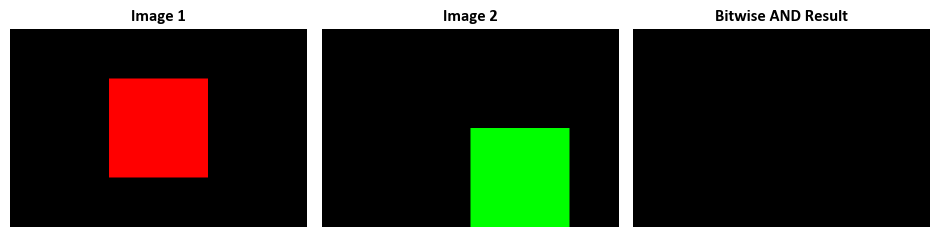

In [49]:
# Create two sample images with different shapes
Image1 = np.zeros((200, 300, 3), dtype=np.uint8)
Image1[50:150, 100:200, :] = [255, 0, 0]  # Blue region

Image2 = np.zeros((200, 300, 3), dtype=np.uint8)
Image2[100:200, 150:250, :] = [0, 255, 0]  # Green region

# Perform a bitwise AND operation between the two images
Result = cv2.bitwise_and(Image1, Image2)

# Create a subplot with three images for visualization
fig, ax = plt.subplots(1, 3, figsize=(9.5, 5))

# Display the first image on the first subplot
_ = ax[0].imshow(Image1)
_ = ax[0].set_title('Image 1', weight = 'bold', fontsize=12)

# Display the second image on the second subplot
_ = ax[1].imshow(Image2)
_ = ax[1].set_title('Image 2', weight = 'bold', fontsize=12)

# Display the result of the bitwise AND operation on the third subplot
_ = ax[2].imshow(Result)
_ = ax[2].set_title('Bitwise AND Result', weight = 'bold', fontsize=12)

# Set aspect ratio and turn off axes for all subplots
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')

plt.tight_layout()

The provided code snippet generates three images and displays them using Matplotlib subplots. It uses the OpenCV library to perform a bitwise AND operation between two sample images, creating a new resulting image. Let's break down the code step by step:

1. **Creating Sample Images:**
   The code creates two sample images with different shapes, both initialized as black images (all pixel values are set to zero). These images are represented as NumPy arrays with dimensions (200, 300, 3), where 200 is the height, 300 is the width, and 3 represents the three color channels (red, green, blue) for each pixel.

   - **Image1:** A blue region (pixels with blue color, [255, 0, 0]) is set within the region defined by [50:150, 100:200].
   - **Image2:** A green region (pixels with green color, [0, 255, 0]) is set within the region defined by [100:200, 150:250].

2. **Bitwise AND Operation:**
   The code performs a bitwise AND operation between Image1 and Image2 using OpenCV's `cv2.bitwise_and` function. This operation combines the two images, preserving only the regions where both images have non-zero (i.e., colored) pixels. The result is stored in the "Result" variable.

### Element-Wise Bitwise NOT with `cv2.bitwise_not`

The `cv2.bitwise_not` function in OpenCV is a valuable tool for performing an element-wise bitwise NOT operation on an input array. This operation inverts every bit, effectively flipping 0s to 1s and 1s to 0s, in the binary representation of each element within the input array. The resulting array, `dst`, maintains the same size and data type as the input array, making it suitable for various image processing tasks {cite:p}`opencv_library, OpenCVDocumentation`.

**Key Concepts:**

1. **Purpose:**
   The primary purpose of `cv2.bitwise_not` is to compute the bitwise NOT (bitwise inversion) of each element in the input array. This creates a corresponding output array with inverted bit values.

2. **Operation:**
   For each element in the input array `src`, the bitwise NOT operation is applied independently. Mathematically, the operation can be represented as:
   ```
   dst(I) = ¬src(I)
   ```
   Here, `dst(I)` is the value at the same position in the output array, and `src(I)` is the value in the input array.

3. **Handling Floating-Point Input:**
   If the input array is of floating-point type (e.g., single-precision or double-precision floating-point), the function uses the machine-specific bit representation of each floating-point element to perform the bitwise NOT operation. This representation typically adheres to the IEEE 754 standard for floating-point representation.

4. **Multi-Channel Arrays:**
   When dealing with multi-channel input arrays (e.g., a color image represented as separate channels), the operation is applied independently to each channel. Consequently, each channel's bit values are inverted, resulting in a multi-channel output array.

**Function Syntax**:
```
cv2.bitwise_not(src[, dst[, mask]]) -> dst
```

**Description**:
The `cv2.bitwise_not` function is a part of the OpenCV library in Python. It performs the element-wise bitwise negation operation (NOT operation) on the input array `src`. Additionally, it allows for an optional `mask` to specify the region where the operation is to be applied. The result of the operation is stored in the output array `dst`.

**Parameters**:
- `src`: The input array (image) on which the bitwise NOT operation is applied.
- `dst` (optional): The output array used to store the result of the operation. If not provided, the function creates a new array.
- `mask` (optional): An 8-bit, single-channel array that specifies elements of the output array to be modified. This mask parameter allows the selective application of the bitwise NOT operation to specific elements based on the mask values.

**Return**:
- `dst`: The output array containing the result of the bitwise NOT operation applied to the input `src`. If `dst` is provided as an argument, the function stores the result in `dst`. Otherwise, a new array is created to hold the result.

**Usage**:
The `cv2.bitwise_not` function is commonly used in image processing to invert every bit (pixel value) of an image. This operation is useful for creating the complement of a binary image or for inverting a mask. By specifying a mask, you can control which region of the image is subject to the bitwise NOT operation.

For more detailed information on `bitwise_not`, you can refer to the [OpenCV documentation](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#bitwise-not).

<font color='Blue'><b>Example:</b></font>

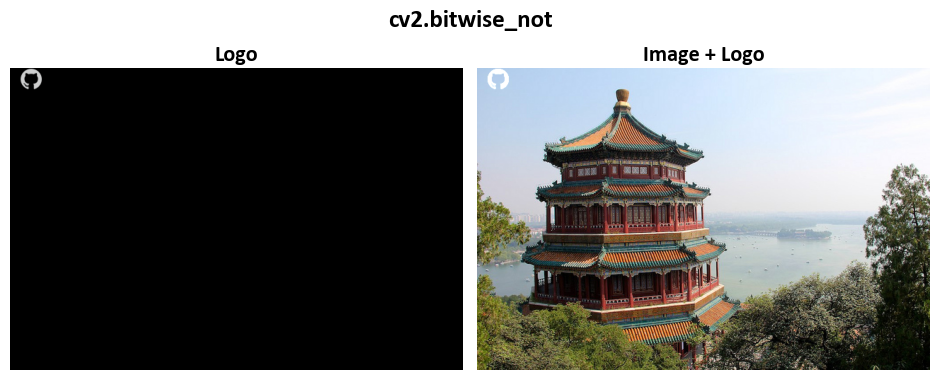

In [9]:
import numpy as np
from skimage import io

# Load the GitHub logo from a URL
Git = io.imread('https://github.githubassets.com/images/modules/open_graph/github-mark.png')

# Define the scale factor for resizing (5% of the original size)
scale = 0.05

# Resize the GitHub logo using OpenCV
Git_resized = cv2.resize(Git, tuple(np.dot(scale, Git.shape[:2][::-1]).astype(int)), interpolation=cv2.INTER_AREA)

# Invert the colors of the resized logo using bitwise NOT
Git_resized = cv2.bitwise_not(Git_resized)

# Get the first image from the dataset
Img = Images[0]

# Create an empty mask with the same dimensions as Img
Mask = 0 * Img

# Place the resized and inverted logo (Git_resized) onto the mask
Mask[0: Git_resized.shape[0], 0: Git_resized.shape[1], :] = Git_resized

# Add the mask with the logo to the original image (Img)
Img = cv2.add(Img, Mask)

# Apply a binary threshold to the "Img" image
# The threshold value is 130, and the maximum value after thresholding is 255
# The result is stored in the "Out" image
_, Out = cv2.threshold(Img, 130, 255, cv2.THRESH_BINARY)

# Show both the original "Img" image and the thresholded "Out" image
# Add titles to the images for clarity
_, _ = ImShow([Mask, Img], ['Logo', 'Image + Logo'], title='cv2.bitwise_not')

This code loads the GitHub logo from a URL, resizes and inverts it, and then adds the resized logo to an image from a dataset. The final result is shown in a subplot, illustrating the original image with the added logo. The use of `cv2.bitwise_not` inverts the logo, and the logo is placed on the mask using slicing. The `cv2.add` function is used to combine the original image and the mask with the logo. The code also provides visualizations using matplotlib subplots for comparison.

### Element-Wise Bitwise OR with `cv2.bitwise_or`

The `cv2.bitwise_or` function in OpenCV is a powerful tool for performing an element-wise bitwise disjunction (logical OR) operation on input arrays. This operation combines the binary representation of each element in the input arrays, producing a new array with the same size and data type as the input arrays. Here's a detailed breakdown of how `cv2.bitwise_or` behaves {cite:p}`opencv_library, OpenCVDocumentation`:

**1. Operation on Two Arrays (`src1` and `src2` with the same size):**
   - When both input arrays (`src1` and `src2`) have the same size, the function computes the logical disjunction (bitwise OR) between corresponding elements:
     ```
     dst(I) = src1(I) OR src2(I) if mask(I) ≠ 0
     ```
   - The operation is performed element-wise. Each element in the resulting array `dst` is the result of the logical OR operation between the corresponding elements in `src1` and `src2`.
   - The optional `mask` parameter allows for selective application of the operation based on the mask values. If `mask(I)` is non-zero, the operation is applied; otherwise, the corresponding element in `dst` remains unchanged.

**2. Operation on an Array and a Scalar (`src2` as a scalar):**
   - If `src2` is a scalar (a single value), the function computes the bitwise OR operation between each element of `src1` and the scalar value:
     ```
     dst(I) = src1(I) OR src2 if mask(I) ≠ 0
     ```
   - If the number of elements in `src1` matches the number of channels in `src2`, the operation can be performed. The scalar is first converted to an array of the same type as `src1`.

**3. Operation on a Scalar and an Array (`src1` as a scalar):**
   - Similarly, if `src1` is a scalar, the function computes the bitwise OR operation between the scalar value and each element of `src2`:
     ```
     dst(I) = src1 OR src2(I) if mask(I) ≠ 0
     ```
   - If the number of elements in `src2` matches the number of channels in `src1`, the scalar is first converted to an array of the same type as `src2`.

**4. Handling Floating-Point Arrays and Multi-Channel Arrays:**
   - For floating-point input arrays, the machine-specific bit representations (usually IEEE754-compliant) are used for the operation.
   - If the input arrays are multi-channel (e.g., a color image with separate channels), the operation is applied independently to each channel.

**Function Syntax**:
```python
cv2.bitwise_or(src1, src2[, dst[, mask]]) -> dst
```

**Description**:
The `cv2.bitwise_or` function is part of the OpenCV library in Python. It performs the element-wise bitwise disjunction (OR operation) between two input arrays `src1` and `src2`. An optional `mask` can be provided to specify the region where the operation is to be applied. The result of the operation is stored in the output array `dst`.

**Parameters**:
- `src1`: The first input array (image) on which the bitwise OR operation is applied.
- `src2`: The second input array (image) on which the bitwise OR operation is applied.
- `dst` (optional): The output array used to store the result of the operation. If not provided, the function creates a new array.
- `mask` (optional): A mask specifying the region where the operation should be performed. The dimensions of the mask must match the dimensions of `src1` and `src2`.

**Return**:
- `dst`: The output array containing the result of the bitwise OR operation applied to the input `src1` and `src2`. If `dst` is provided as an argument, the function stores the result in `dst`. Otherwise, a new array is created to hold the result.

**Usage**:
The `cv2.bitwise_or` function is commonly used in image processing to perform logical OR operations on corresponding pixels of two images. It's often used to combine binary data or create masks. By providing a mask, you can control which regions of the input images are subject to the bitwise OR operation.

For further details on `bitwise_or`, refer to the [OpenCV documentation](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#bitwise-or).

<font color='Blue'><b>Example:</b></font>

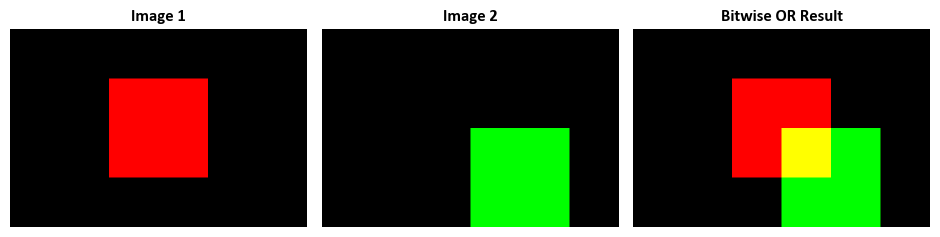

In [10]:
# Create two sample images with different shapes
Image1 = np.zeros((200, 300, 3), dtype=np.uint8)
Image1[50:150, 100:200, :] = [255, 0, 0]  # Blue region

Image2 = np.zeros((200, 300, 3), dtype=np.uint8)
Image2[100:200, 150:250, :] = [0, 255, 0]  # Green region

# Perform a bitwise OR operation between the two images
Result = cv2.bitwise_or(Image1, Image2)

# Create a subplot with three images for visualization
fig, ax = plt.subplots(1, 3, figsize=(9.5, 5))

# Display the first image on the first subplot
_ = ax[0].imshow(Image1)
_ = ax[0].set_title('Image 1', weight = 'bold', fontsize=12)

# Display the second image on the second subplot
_ = ax[1].imshow(Image2)
_ = ax[1].set_title('Image 2', weight = 'bold', fontsize=12)

# Display the result of the bitwise OR operation on the third subplot
_ = ax[2].imshow(Result)
_ = ax[2].set_title('Bitwise OR Result', weight = 'bold', fontsize=12)

# Set aspect ratio and turn off axes for all subplots
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
    
plt.tight_layout()

The provided code snippet generates three images and displays them using Matplotlib subplots. It utilizes OpenCV's bitwise OR operation to combine pixel values from two sample images. Let's break down the code step by step:

1. **Creating Sample Images:**
   - Two sample images, `Image1` and `Image2`, are created using NumPy. Both images have dimensions (200, 300, 3), which means they are 200 pixels in height, 300 pixels in width, and have 3 color channels (red, green, blue) for each pixel.
   - In `Image1`, a blue region is created by assigning the value [255, 0, 0] (pure blue) to a specific rectangular region ([50:150, 100:200]) within the image.
   - In `Image2`, a green region is created by assigning the value [0, 255, 0] (pure green) to a specific rectangular region ([100:200, 150:250]) within the image.

2. **Bitwise OR Operation:**
   - The code performs a bitwise OR operation between `Image1` and `Image2` using OpenCV's `cv2.bitwise_or` function. This operation combines the two images by taking the maximum pixel value for each channel at corresponding pixel locations. The result is stored in the "Result" variable.

### Element-Wise Bitwise XOR with `cv2.bitwise_xor`

The `cv2.bitwise_xor` function in OpenCV is a versatile tool for performing an element-wise bitwise exclusive OR (XOR) operation on input arrays. This operation combines the binary representation of each element in the input arrays, producing a new array with the same size and data type as the input arrays. Here's a detailed breakdown of how `cv2.bitwise_xor` behaves {cite:p}`opencv_library, OpenCVDocumentation`:

**1. Operation on Two Arrays (`src1` and `src2` with the same size):**
   - When both input arrays (`src1` and `src2`) have the same size, the function computes the logical exclusive OR (bitwise XOR) between corresponding elements:
     ```
     dst(I) = src1(I) XOR src2(I) if mask(I) ≠ 0
     ```
   - The operation is performed element-wise. Each element in the resulting array `dst` is the result of the logical XOR operation between the corresponding elements in `src1` and `src2`.
   - The optional `mask` parameter allows for selective application of the operation based on the mask values. If `mask(I)` is non-zero, the operation is applied; otherwise, the corresponding element in `dst` remains unchanged.

**2. Operation on an Array and a Scalar (`src2` as a scalar):**
   - If `src2` is a scalar (a single value), the function computes the bitwise XOR operation between each element of `src1` and the scalar value:
     ```
     dst(I) = src1(I) XOR src2 if mask(I) ≠ 0
     ```
   - If the number of elements in `src1` matches the number of channels in `src2`, the operation can be performed. The scalar is first converted to an array of the same type as `src1`.

**3. Operation on a Scalar and an Array (`src1` as a scalar):**
   - Similarly, if `src1` is a scalar, the function computes the bitwise XOR operation between the scalar value and each element of `src2`:
     ```
     dst(I) = src1 XOR src2(I) if mask(I) ≠ 0
     ```
   - If the number of elements in `src2` matches the number of channels in `src1`, the scalar is first converted to an array of the same type as `src2`.

**4. Handling Floating-Point Arrays and Multi-Channel Arrays:**
   - For floating-point input arrays, the machine-specific bit representations (usually IEEE754-compliant) are used for the operation.
   - If the input arrays are multi-channel (e.g., a color image with separate channels), the operation is applied independently to each channel.

**Function Syntax**:
```python
cv2.bitwise_xor(src1, src2[, dst[, mask]]) -> dst
```

**Description**:
The `cv2.bitwise_xor` function is part of the OpenCV library in Python. It performs the element-wise bitwise exclusive OR (XOR) operation between two input arrays `src1` and `src2`. An optional `mask` can be provided to specify the region where the operation is to be applied. The result of the operation is stored in the output array `dst`.

**Parameters**:
- `src1`: The first input array (image) on which the bitwise XOR operation is applied.
- `src2`: The second input array (image) on which the bitwise XOR operation is applied.
- `dst` (optional): The output array used to store the result of the operation. If not provided, the function creates a new array.
- `mask` (optional): A mask specifying the region where the operation should be performed. The dimensions of the mask must match the dimensions of `src1` and `src2`.

**Return**:
- `dst`: The output array containing the result of the bitwise XOR operation between `src1` and `src2`. If `dst` is provided as an argument, the function stores the result in `dst`. Otherwise, a new array is created to hold the result.

**Usage**:
The `cv2.bitwise_xor` function is commonly used in image processing to perform logical XOR operations on corresponding pixels of two images. It's useful for tasks like creating binary patterns, detecting differences between images, and other operations that involve exclusive combinations of binary data. By providing a mask, you can control which regions of the input images are subject to the bitwise XOR operation.

By utilizing the `cv2.bitwise_xor` function, you can manipulate images at the bit level, enabling a wide range of operations for binary data manipulation in various computer vision applications. Understanding these operations is valuable for various computer vision tasks involving binary representations.

For further details on `bitwise_xor`, refer to the [OpenCV documentation](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#bitwise-xor).

<font color='Blue'><b>Example:</b></font>

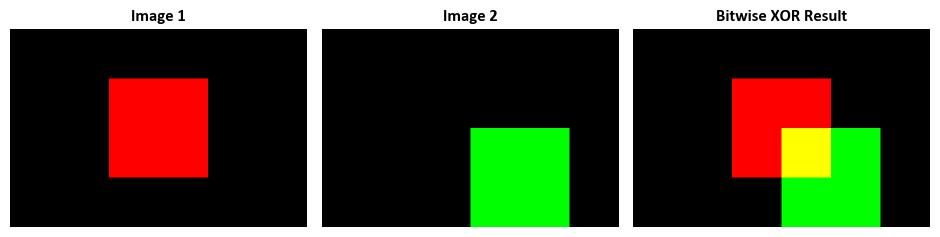

In [52]:
# Create two sample images with different shapes
Image1 = np.zeros((200, 300, 3), dtype=np.uint8)
Image1[50:150, 100:200, :] = [255, 0, 0]  # Blue region

Image2 = np.zeros((200, 300, 3), dtype=np.uint8)
Image2[100:200, 150:250, :] = [0, 255, 0]  # Green region

# Perform a bitwise XOR operation between the two images
Result = cv2.bitwise_xor(Image1, Image2)

# Create a subplot with three images for visualization
fig, ax = plt.subplots(1, 3, figsize=(9.5, 5))

# Display the first image on the first subplot
_ = ax[0].imshow(Image1)
_ = ax[0].set_title('Image 1', weight = 'bold', fontsize=12)

# Display the second image on the second subplot
_ = ax[1].imshow(Image2)
_ = ax[1].set_title('Image 2', weight = 'bold', fontsize=12)

# Display the result of the bitwise XOR operation on the third subplot
_ = ax[2].imshow(Result)
_ = ax[2].set_title('Bitwise XOR Result', weight = 'bold', fontsize=12)

# Set aspect ratio and turn off axes for all subplots
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
    
plt.tight_layout()

Let's break down the code step by step:

1. **Creating Sample Images:**
   - Two sample images, `Image1` and `Image2`, are created using NumPy. Both images have dimensions (200, 300, 3), which means they are 200 pixels in height, 300 pixels in width, and have 3 color channels (red, green, blue) for each pixel.
   - In `Image1`, a blue region is created by assigning the value [255, 0, 0] (pure blue) to a specific rectangular region ([50:150, 100:200]) within the image.
   - In `Image2`, a green region is created by assigning the value [0, 255, 0] (pure green) to a specific rectangular region ([100:200, 150:250]) within the image.

2. **Bitwise XOR Operation:**
   - The code performs a bitwise XOR operation between `Image1` and `Image2` using OpenCV's `cv2.bitwise_xor` function. This operation combines the two images by applying the XOR operation to the pixel values for each channel at corresponding pixel locations. The result is stored in the "Result" variable

`````{admonition} Summary
:class: tip

`cv2.bitwise_and`, `cv2.bitwise_not`, `cv2.bitwise_or`, and `cv2.bitwise_xor` are fundamental bitwise operations provided by the OpenCV library for image processing. Here are the differences and similarities between these operations:

1. **`cv2.bitwise_and(src1, src2[, dst[, mask]])`**:
   - **Function**: Performs a bitwise AND operation between corresponding pixels of two input images (src1 and src2).
   - **Usage**: This operation results in an output image where the corresponding pixels are retained if both corresponding pixels in the input images are non-zero.
   - **Similarity**: Similar to the logical AND operation but operates at the bit level for each pixel in the images.
   
2. **`cv2.bitwise_not(src[, dst[, mask]])`**:
   - **Function**: Inverts every bit of the input image (src).
   - **Usage**: This operation results in an output image where all the 1s (white pixels) in the input image become 0s (black pixels), and vice versa.
   - **Similarity**: Similar to the logical NOT operation but operates at the bit level for each pixel in the image.

3. **`cv2.bitwise_or(src1, src2[, dst[, mask]])`**:
   - **Function**: Performs a bitwise OR operation between corresponding pixels of two input images (src1 and src2).
   - **Usage**: This operation results in an output image where the corresponding pixels are retained if at least one of the corresponding pixels in the input images is non-zero.
   - **Similarity**: Similar to the logical OR operation but operates at the bit level for each pixel in the images.

4. **`cv2.bitwise_xor(src1, src2[, dst[, mask]])`**:
   - **Function**: Performs a bitwise XOR (exclusive OR) operation between corresponding pixels of two input images (src1 and src2).
   - **Usage**: This operation results in an output image where the corresponding pixels are retained if the corresponding pixels in the input images are different (one is 0 and the other is 1).
   - **Similarity**: Similar to the logical XOR operation but operates at the bit level for each pixel in the images.

**Differences**:
- The primary difference lies in the specific bitwise operation each function performs (AND, NOT, OR, XOR) on the corresponding pixels.
- The `bitwise_and` and `bitwise_or` functions retain specific pixel combinations based on the logical AND and OR conditions, respectively.
- The `bitwise_not` function inverts the bits of the input image.
- The `bitwise_xor` function retains pixels only when there is a difference between the corresponding pixels in the input images.

**Similarities**:
- All these operations work at the bit level, meaning they operate on individual bits of the pixel values.
- They are useful for various image processing tasks, including masking, combining regions, and altering specific aspects of images based on pixel values.
- They allow for fine-grained control over pixel manipulation in image processing tasks.

`````

## Colorspace Conversion with `cv2.cvtColor()`

The `cv2.cvtColor()` function in the Python OpenCV library is a powerful tool for changing the colorspace of an input image or rearranging its image channels. It allows you to convert an input image (source) from one colorspace to another, based on a specified color conversion code. The resulting image can be stored in the output (destination) image, if provided, or a new image is created to hold the converted result {cite:p}`opencv_library, OpenCVDocumentation`.

Here's an in-depth explanation of the parameters and the purpose of this function:

- `src`: This parameter represents the input image (source) that you intend to convert. It should be a numpy array, effectively representing the image you want to transform.

- `code`: The `code` parameter specifies the color conversion code or the type of transformation that defines how the input image's colors will be converted. This code is an integer value corresponding to a specific colorspace conversion or channel rearrangement. For example, `cv2.COLOR_BGR2GRAY` indicates converting from the BGR colorspace to grayscale. The available conversion codes are defined in OpenCV's documentation.

- `dst` (optional): The `dst` parameter serves as the output image (destination) where the result of the colorspace conversion will be stored. If this parameter is not provided, a new image will be created to store the converted result.

- `dstCn` (optional): The `dstCn` parameter specifies the number of channels in the destination image. It is used when you want to change the number of channels in the output image. If this parameter is not specified, it defaults to 0, and the number of channels is inferred based on the conversion code.

Here's the structure of the function signature:

```python
cv2.cvtColor(src, code[, dst[, dstCn]]) -> dst
```

The `cv2.cvtColor()` function provides a versatile way to transform images between various colorspace representations, such as RGB, grayscale, HSV, YUV, and more. It is a fundamental operation in image processing that enables you to adapt images to different processing techniques or to analyze them from various color perspectives.

For more detailed information and the list of available color conversion codes, you can refer to the [OpenCV documentation on `cvtColor`](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor). This function plays a crucial role in image manipulation and analysis, allowing you to work with images in different colorspaces, which is essential in various computer vision and image processing tasks.

### RGB to Grayscale

To convert an image from the RGB (Red, Green, Blue) color space to grayscale, you can use the `cv2.cvtColor()` function from the OpenCV library with the appropriate color conversion code. Here's how to do it in Python:

<font color='Blue'><b>Example:</b></font>

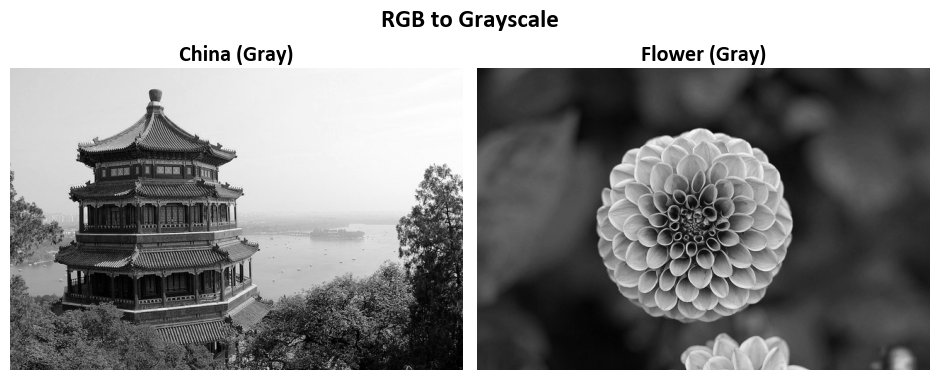

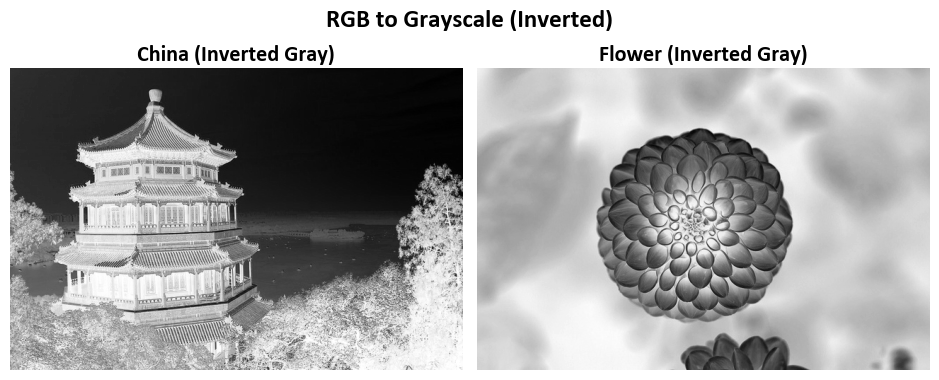

In [45]:
# Note that `Images` and `Names` were defined in the first example.

# Convert RGB to Grayscale
gray_images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in Images]
# Convert each RGB image in the list `Images` to grayscale using cv2.COLOR_BGR2GRAY
inverted_gray_images = [cv2.bitwise_not(image) for image in gray_images]
# Invert the colors of the grayscale images using bitwise_not to create inverted grayscale images

# Create titles for the images
gray_titles = [f'{name} (Gray)' for name in Names]
# Create titles for grayscale images by adding "(Gray)" to the original image names
inverted_gray_titles = [f'{name} (Inverted Gray)' for name in Names]
# Create titles for inverted grayscale images by adding "(Inverted Gray)" to the original image names

# Note: Grayscale images only have one color channel (band).
# Plot the images
_, _ = ImShow(gray_images, gray_titles, title='RGB to Grayscale', grayscale=True)
# Display the grayscale images using the ImShow function with appropriate titles and a grayscale flag
_, _ = ImShow(inverted_gray_images, inverted_gray_titles, title='RGB to Grayscale (Inverted)', grayscale=True)
# Display the inverted grayscale images using the ImShow function with appropriate titles and a grayscale flag

### RGB to HSV

Converting an image from the RGB (Red, Green, Blue) color space to the HSV (Hue, Saturation, Value) color space is a common operation in image processing. The HSV color space separates the color information into three components: hue (the color itself), saturation (the intensity of the color), and value (the brightness). Here's how to perform the RGB to HSV conversion using OpenCV in Python:

<font color='Blue'><b>Example:</b></font>

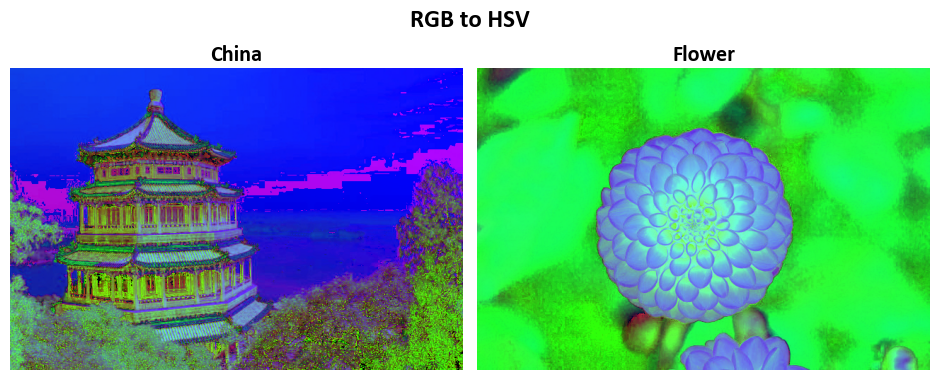

In [14]:
# Note that `Images` and `Names` were defined in the first example.

# Convert Images from RGB to HSV color space
augmented_images_hsv = [cv2.cvtColor(image, cv2.COLOR_BGR2HSV) for image in Images]

# Display the augmented images in HSV color space
_ = ImShow(augmented_images_hsv, Names, title='RGB to HSV')